### Importing Required Libraries

In [221]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from tabulate import tabulate

In [222]:
ipl2020_data = pd.read_csv('17_18_19_20.csv') #loading data into dataframe

### Visualising relation between input features and the target value

Text(0, 0.5, 'Total Score')

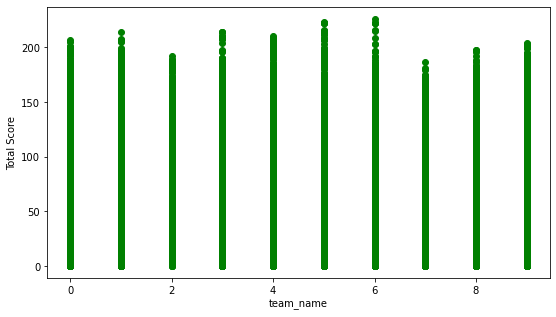

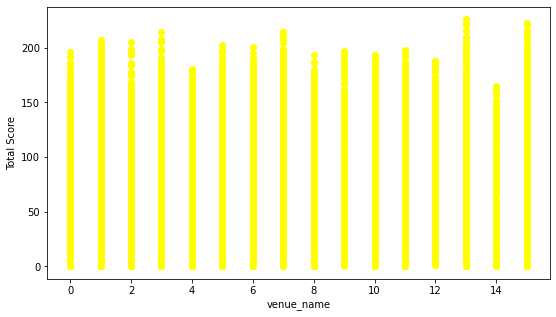

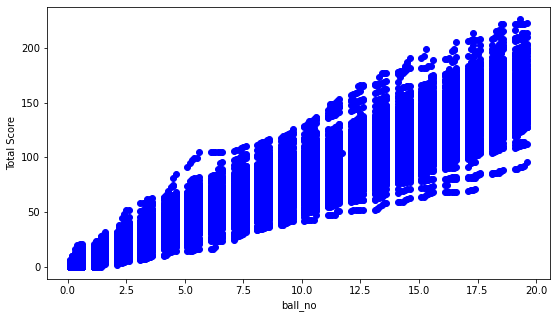

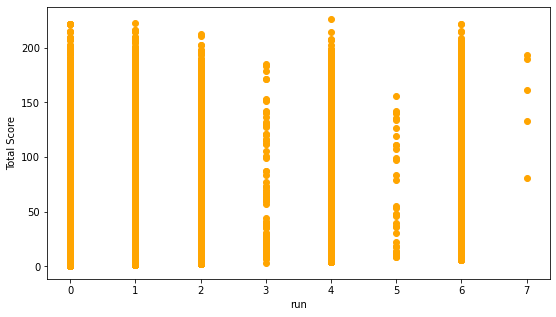

In [224]:
ipl2020_data['team_name'] = LabelEncoder().fit_transform(ipl2020_data['team_name'])
ipl2020_data['venue_name'] = LabelEncoder().fit_transform(ipl2020_data['venue_name'])

plt.figure(figsize=(9,5))
plt.scatter(ipl2020_data['team_name'], ipl2020_data['totalScore'] ,color = 'green', marker = 'o')
plt.xlabel ('team_name')
plt.ylabel ('Total Score')
plt.figure(figsize=(9,5))
plt.scatter(ipl2020_data['venue_name'], ipl2020_data['totalScore'] ,color = 'yellow', marker = 'o')
plt.xlabel ('venue_name')
plt.ylabel ('Total Score')
plt.figure(figsize=(9,5))
plt.scatter(ipl2020_data['ball_no'], ipl2020_data['totalScore'] ,color = 'blue', marker = 'o')
plt.xlabel ('ball_no')
plt.ylabel ('Total Score')
plt.figure(figsize=(9,5))
plt.scatter(ipl2020_data['run'], ipl2020_data['totalScore'] ,color = 'orange', marker = 'o')
plt.xlabel ('run')
plt.ylabel ('Total Score')

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 5 Fold CV for choosing optimal value of k , γ = 5

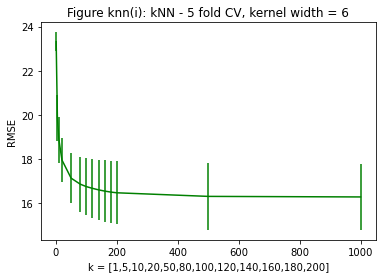

╒══════╤═════════╤═══════════╕
│    k │    RMSE │   std_err │
╞══════╪═════════╪═══════════╡
│    1 │ 23.3144 │  0.428016 │
├──────┼─────────┼───────────┤
│    5 │ 19.8727 │  1.04185  │
├──────┼─────────┼───────────┤
│   10 │ 18.8694 │  1.03077  │
├──────┼─────────┼───────────┤
│   20 │ 17.9538 │  1.01788  │
├──────┼─────────┼───────────┤
│   50 │ 17.1328 │  1.12896  │
├──────┼─────────┼───────────┤
│   80 │ 16.8603 │  1.24965  │
├──────┼─────────┼───────────┤
│  100 │ 16.7494 │  1.29258  │
├──────┼─────────┼───────────┤
│  120 │ 16.6713 │  1.32356  │
├──────┼─────────┼───────────┤
│  140 │ 16.6033 │  1.35639  │
├──────┼─────────┼───────────┤
│  160 │ 16.5471 │  1.38575  │
├──────┼─────────┼───────────┤
│  180 │ 16.5022 │  1.41055  │
├──────┼─────────┼───────────┤
│  200 │ 16.4694 │  1.42874  │
├──────┼─────────┼───────────┤
│  500 │ 16.3066 │  1.5052   │
├──────┼─────────┼───────────┤
│ 1000 │ 16.2813 │  1.49373  │
╘══════╧═════════╧═══════════╛


In [210]:
k=[1,5,10,20,50,80,100,120,140,160,180,200,500,1000]
kf = KFold(n_splits=5)
mean_error=[]; 
std_error=[];
dict={}
def gk(ds):
    kw = 5
    weights = np.exp(-(ds**2)/kw)
    return weights
col_names=["k","RMSE","std_err"]
for ki in k:
    model = neighbors.KNeighborsRegressor(n_neighbors=ki,weights=gk)
    scores=[]
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        y_pred=model.predict(X[test])
        #scores.append(model.score(X[test], y[test]))
        scores.append(sqrt(mean_squared_error(y[test],y_pred)))
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std()) 
    dict={'k':k,'RMSE':mean_error,'std_err':std_error}
plt.errorbar(k, mean_error,yerr=std_error ,color = 'green') 
plt.xlabel('k = [1,5,10,20,50,80,100,120,140,160,180,200]')
plt.ylabel('RMSE')
plt.title('Figure knn(i): kNN - 5 fold CV, kernel width = 6')
plt.show()
print(tabulate(dict, headers=col_names, tablefmt="fancy_grid"))

### 5 Fold CV for choosing optimal value of γ, k = 160

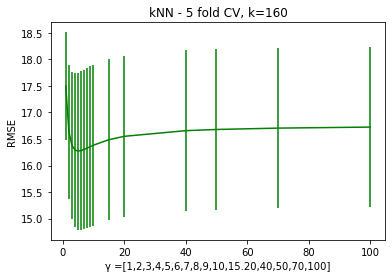

╒══════╤═════════╤═══════════╕
│   γ  │    RMSE │   std_err │
╞══════╪═════════╪═══════════╡
│    1 │ 17.4955 │   1.0144  │
├──────┼─────────┼───────────┤
│    2 │ 16.6383 │   1.26053 │
├──────┼─────────┼───────────┤
│    3 │ 16.3802 │   1.39009 │
├──────┼─────────┼───────────┤
│    4 │ 16.2922 │   1.44814 │
├──────┼─────────┼───────────┤
│    5 │ 16.272  │   1.47762 │
├──────┼─────────┼───────────┤
│    6 │ 16.2813 │   1.49373 │
├──────┼─────────┼───────────┤
│    7 │ 16.3032 │   1.50291 │
├──────┼─────────┼───────────┤
│    8 │ 16.3297 │   1.50826 │
├──────┼─────────┼───────────┤
│    9 │ 16.357  │   1.51141 │
├──────┼─────────┼───────────┤
│   10 │ 16.3833 │   1.51324 │
├──────┼─────────┼───────────┤
│   15 │ 16.4862 │   1.51508 │
├──────┼─────────┼───────────┤
│   20 │ 16.5499 │   1.51411 │
├──────┼─────────┼───────────┤
│   40 │ 16.6565 │   1.5108  │
├──────┼─────────┼───────────┤
│   50 │ 16.6788 │   1.50992 │
├──────┼─────────┼───────────┤
│   70 │ 16.7045 │   1.50883 │
├──────┼

In [213]:
k=160
w=[1,2,3,4,5,6,7,8,9,10,15,20,40,50,70,100]
kf = KFold(n_splits=5)
mean_error=[]; 
std_error=[];
dict={}

col_names=["γ ","RMSE","std_err"]
for wi in w:
    def gk(ds):
        kw = wi
        weights = np.exp(-(ds**2)/kw)
        return weights
    model = neighbors.KNeighborsRegressor(n_neighbors=ki,weights=gk)
    scores=[]
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        y_pred=model.predict(X[test])
        #scores.append(model.score(X[test], y[test]))
        scores.append(sqrt(mean_squared_error(y[test],y_pred)))
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std()) 
    dict={'γ ':w,'RMSE':mean_error,'std_err':std_error}
plt.errorbar(w, mean_error,yerr=std_error ,color = 'green') 
plt.xlabel('γ =[1,2,3,4,5,6,7,8,9,10,15.20,40,50,70,100]')
plt.ylabel('RMSE')
plt.title('kNN - 5 fold CV, k=160')
plt.show()
print(tabulate(dict, headers=col_names, tablefmt="fancy_grid"))

### Training Model on IPL Data of 2017,18,19,20. Prediction Plot on Training Dataset along with MAE,RMSE,R2 Error Calculation

Final R2 0.9069425293927603
Mean absolute error 10.819931584122925
Root Mean Sqr error 14.595165135602599


Text(0.5, 1.0, 'kNN Regression: Predicition on train data (Total Score Vs Overs(Ball no))')

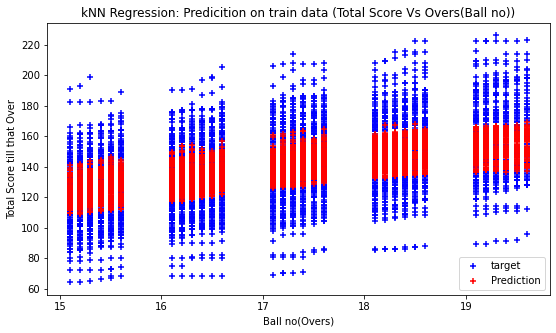

In [220]:
def gk(ds):
    kw = 5
    weights = np.exp(-(ds**2)/kw)
    return weights
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 160,weights= gk)
model_knn.fit(ipl2020_data[['team_name','venue_name','ball_no','run']], ipl2020_data['totalScore']) 
ypred=model_knn.predict(ipl2020_data[['team_name','venue_name','ball_no','run']])

ipl2020_data['prediction']=ypred

print("Final R2", r2_score(ipl2020_data['totalScore'],ypred))
print("Mean absolute error", mean_absolute_error(ipl2020_data['totalScore'],ypred))
print("Root Mean Sqr error", sqrt(mean_squared_error(ipl2020_data['totalScore'],ypred)))

df1=ipl2020_data.loc[(ipl2020_data['ball_no'] >= 15.0)]

plt.figure(figsize=(9, 5))
plt.scatter(df1['ball_no'] ,df1['totalScore'],color = 'blue', marker = '+')
plt.scatter(df1['ball_no'] ,df1['prediction'] ,color = 'red', marker = '+')
plt.rc('font', size=10)
plt.ylabel ('Total Score till that Over')
plt.xlabel ('Ball no(Overs)')
plt.legend(['target','Prediction'],loc='lower right')
plt.title("kNN Regression: Predicition on train data (Total Score Vs Overs(Ball no))")

### Testing the Model on IPL Data of 2022, Prediction Plot on Test Dataset along with MAE,RMSE,R2 Error Calculation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Final R2 0.8899667894935976
Mean absolute error 12.590825051999076
Root Mean Sqr error 16.218204569675144


Text(0.5, 1.0, 'kNN Regression: Predicition on test data:IPL 2022 (Total Score Vs Overs(Ball no))')

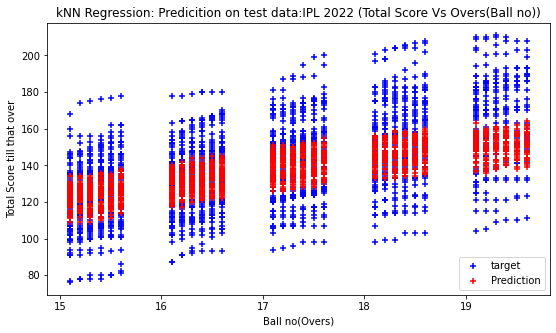

In [219]:
# Reading from the test file

test_data = pd.read_csv("2022_iplScore.csv")

test_data['team_name'] = LabelEncoder().fit_transform(test_data['team_name'])
test_data['venue_name'] = LabelEncoder().fit_transform(test_data['venue_name'])

valid_x_test = test_data.iloc[:,[1,2,3,4]].values
valid_y_test = test_data.iloc[:,10].values

y_pred = model_knn.predict(valid_x_test)
y_pred = np.floor(y_pred)

print("Final R2", r2_score(valid_y_test,y_pred))
print("Mean absolute error", mean_absolute_error(valid_y_test, y_pred))
print("Root Mean Sqr error", sqrt(mean_squared_error(valid_y_test, y_pred)))

test_data['prediction']=y_pred
df=test_data.loc[(test_data['ball_no'] >= 15.0)]
plt.figure(figsize=(9, 5))
plt.scatter(df['ball_no'] ,df['totalScore'],color = 'blue', marker = '+')
plt.scatter(df['ball_no'] ,df['prediction'] ,color = 'red', marker = '+')
plt.rc('font', size=10)
plt.ylabel ('Total Score till that over')
plt.xlabel ('Ball no(Overs)')
plt.legend(['target','Prediction'],loc='lower right')
plt.title("kNN Regression: Predicition on test data:IPL 2022 (Total Score Vs Overs(Ball no))")

### For Checking the Accuracy of our model on each ball 

In [ ]:
def calculate_accuracy(pred, original):
    diff = 1 - ((abs(pred-original))/original)
    if diff >=0:
        return diff
    return 0

In [206]:
accuracy_list = []
y_pred = model_knn.predict(valid_x_test)
y_pred = np.floor(y_pred)
for i in range(len(y_pred)):   
    ball_acc = calculate_accuracy(y_pred[i], valid_y_test[i])
    print("Ball:{}  Original:{}  Predicted:{}   Accuracy:{}".format(valid_x_test[i][2],valid_y_test[i],y_pred[i],ball_acc))
    print("\n")
    accuracy_list.append(ball_acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ratha\AppData\Local\Temp\ipykernel_49760\1450855506.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  diff = 1 - ((abs(pred-original))/original)


Ball:0.1  Original:0  Predicted:6.0   Accuracy:0


Ball:0.2  Original:0  Predicted:7.0   Accuracy:0


Ball:0.3  Original:0  Predicted:7.0   Accuracy:0


Ball:0.4  Original:2  Predicted:7.0   Accuracy:0


Ball:0.5  Original:6  Predicted:13.0   Accuracy:0


Ball:0.6  Original:6  Predicted:7.0   Accuracy:0.8333333333333334


Ball:1.1  Original:8  Predicted:11.0   Accuracy:0.625


Ball:1.2  Original:8  Predicted:10.0   Accuracy:0.75


Ball:1.3  Original:8  Predicted:11.0   Accuracy:0.625


Ball:1.4  Original:8  Predicted:12.0   Accuracy:0.5


Ball:1.5  Original:8  Predicted:12.0   Accuracy:0.5


Ball:1.6  Original:8  Predicted:13.0   Accuracy:0.375


Ball:2.1  Original:8  Predicted:17.0   Accuracy:0


Ball:2.2  Original:8  Predicted:18.0   Accuracy:0


Ball:2.3  Original:9  Predicted:19.0   Accuracy:0


Ball:2.4  Original:11  Predicted:22.0   Accuracy:0.0


Ball:2.5  Original:15  Predicted:26.0   Accuracy:0.2666666666666667


Ball:2.6  Original:15  Predicted:22.0   Accuracy:0.5333333333333

Ball:1.1  Original:11  Predicted:9.0   Accuracy:0.8181818181818181


Ball:1.1  Original:15  Predicted:15.0   Accuracy:1.0


Ball:1.2  Original:15  Predicted:9.0   Accuracy:0.6


Ball:1.3  Original:19  Predicted:16.0   Accuracy:0.8421052631578947


Ball:1.4  Original:19  Predicted:10.0   Accuracy:0.5263157894736843


Ball:1.5  Original:23  Predicted:17.0   Accuracy:0.7391304347826086


Ball:1.6  Original:24  Predicted:12.0   Accuracy:0.5


Ball:2.1  Original:25  Predicted:16.0   Accuracy:0.64


Ball:2.2  Original:29  Predicted:21.0   Accuracy:0.7241379310344828


Ball:2.3  Original:30  Predicted:18.0   Accuracy:0.6


Ball:2.4  Original:31  Predicted:18.0   Accuracy:0.5806451612903225


Ball:2.5  Original:31  Predicted:19.0   Accuracy:0.6129032258064516


Ball:2.6  Original:31  Predicted:20.0   Accuracy:0.6451612903225806


Ball:3.1  Original:32  Predicted:24.0   Accuracy:0.75


Ball:3.2  Original:32  Predicted:25.0   Accuracy:0.78125


Ball:3.3  Original:32  Predicted:25.0   Accuracy:0.



Ball:17.4  Original:195  Predicted:147.0   Accuracy:0.7538461538461538


Ball:17.5  Original:199  Predicted:144.0   Accuracy:0.7236180904522613


Ball:17.6  Original:200  Predicted:143.0   Accuracy:0.7150000000000001


Ball:18.1  Original:201  Predicted:145.0   Accuracy:0.7213930348258706


Ball:18.2  Original:203  Predicted:146.0   Accuracy:0.7192118226600985


Ball:18.3  Original:204  Predicted:146.0   Accuracy:0.7156862745098039


Ball:18.4  Original:205  Predicted:147.0   Accuracy:0.7170731707317073


Ball:18.4  Original:206  Predicted:147.0   Accuracy:0.7135922330097088


Ball:18.5  Original:207  Predicted:147.0   Accuracy:0.7101449275362319


Ball:18.6  Original:207  Predicted:147.0   Accuracy:0.7101449275362319


Ball:19.1  Original:209  Predicted:149.0   Accuracy:0.7129186602870814


Ball:19.2  Original:209  Predicted:147.0   Accuracy:0.7033492822966507


Ball:19.3  Original:210  Predicted:148.0   Accuracy:0.7047619047619047


Ball:19.4  Original:210  Predicted:148.0   Accura



Ball:2.1  Original:25  Predicted:16.0   Accuracy:0.64


Ball:2.2  Original:29  Predicted:21.0   Accuracy:0.7241379310344828


Ball:2.3  Original:29  Predicted:16.0   Accuracy:0.5517241379310345


Ball:2.4  Original:35  Predicted:23.0   Accuracy:0.6571428571428571


Ball:2.5  Original:35  Predicted:17.0   Accuracy:0.48571428571428577


Ball:2.6  Original:36  Predicted:19.0   Accuracy:0.5277777777777778


Ball:3.1  Original:36  Predicted:23.0   Accuracy:0.6388888888888888


Ball:3.2  Original:36  Predicted:24.0   Accuracy:0.6666666666666667


Ball:3.3  Original:40  Predicted:30.0   Accuracy:0.75


Ball:3.4  Original:41  Predicted:26.0   Accuracy:0.6341463414634146


Ball:3.5  Original:42  Predicted:27.0   Accuracy:0.6428571428571428


Ball:3.6  Original:46  Predicted:32.0   Accuracy:0.6956521739130435


Ball:4.1  Original:47  Predicted:32.0   Accuracy:0.6808510638297872


Ball:4.2  Original:48  Predicted:33.0   Accuracy:0.6875


Ball:4.3  Original:49  Predicted:34.0   Accuracy:0.693877

Ball:2.6  Original:21  Predicted:22.0   Accuracy:0.9523809523809523


Ball:3.1  Original:21  Predicted:26.0   Accuracy:0.7619047619047619


Ball:3.2  Original:21  Predicted:27.0   Accuracy:0.7142857142857143


Ball:3.3  Original:21  Predicted:28.0   Accuracy:0.6666666666666667


Ball:3.4  Original:21  Predicted:28.0   Accuracy:0.6666666666666667


Ball:3.5  Original:21  Predicted:29.0   Accuracy:0.6190476190476191


Ball:3.6  Original:22  Predicted:31.0   Accuracy:0.5909090909090908


Ball:4.1  Original:22  Predicted:34.0   Accuracy:0.4545454545454546


Ball:4.2  Original:22  Predicted:34.0   Accuracy:0.4545454545454546


Ball:4.3  Original:22  Predicted:35.0   Accuracy:0.40909090909090906


Ball:4.4  Original:22  Predicted:35.0   Accuracy:0.40909090909090906


Ball:4.5  Original:23  Predicted:38.0   Accuracy:0.34782608695652173


Ball:4.6  Original:23  Predicted:38.0   Accuracy:0.34782608695652173


Ball:5.1  Original:29  Predicted:48.0   Accuracy:0.3448275862068966


Ball:5.2  Origin